# Regresion Basica: Predecir eficiencia de gasolina

Este libro usa el set de datos clasico [Auto MPG](https://archive.ics.uci.edu/ml/datasets/auto+mpg) y construye un modelo para predecir el consumo de vehiculos de 1970 y 1980. Para hacer esto proveeremos el modelo con una descripcion de muchos automoviles de ese periodo. Esta descripcion incluye atributos como: Cilindros, desplazamiento, potencia y peso.

El objetivo de este ejercicio es predecir el target miles per galon (MPG), que vendría a representar las millas por galón de combustible.

Este ejemplo usa el API `tf.keras` , revise [Esta Guia](https://www.tensorflow.org/guide/keras) para obtener mas detalles.

In [2]:
pip install seaborn

  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
Using cached seaborn-0.13.2-py3-none-any.whl (294 kB)
Note: you may need to restart the kernel to use updated packages.


In [1]:
import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

import tensorflow as tf

from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

2.16.1


In [2]:
import numpy as np

## El set de Datos de MPG

El set de datos esta disponible de el siguiente repositorio [UCI Machine Learning Repository](https://archive.ics.uci.edu/ml/).

### Obtenga los datos
Primero descargue el set de datos.

In [3]:
dataset_path = keras.utils.get_file("auto-mpg.data",
                                    "http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data")
dataset_path

'C:\\Users\\Victor\\.keras\\datasets\\auto-mpg.data'

In [4]:
pd.read_csv(r"http://archive.ics.uci.edu/ml/machine-learning-databases/auto-mpg/auto-mpg.data", sep="\t")

,18.0 8 307.0 130.0 3504. 12.0 70 1,chevrolet chevelle malibu
0,15.0 8 350.0 165.0 3693. 11...,buick skylark 320
1,18.0 8 318.0 150.0 3436. 11...,plymouth satellite
2,16.0 8 304.0 150.0 3433. 12...,amc rebel sst
3,17.0 8 302.0 140.0 3449. 10...,ford torino
4,15.0 8 429.0 198.0 4341. 10...,ford galaxie 500
...,...,...
392,27.0 4 140.0 86.00 2790. 15...,ford mustang gl
393,44.0 4 97.00 52.00 2130. 24...,vw pickup
394,32.0 4 135.0 84.00 2295. 11...,dodge rampage
395,28.0 4 120.0 79.00 2625. 18...,ford ranger


Importelo usando pandas.

In [5]:
column_names = ['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration', 'Model Year', 'Origin', 'Car Name']

In [6]:
# raw_dataset = pd.read_csv(dataset_path, names = column_names, na_values='?', sep= ' ', comment = '\t', skipinitialspace = True)
# raw_dataset

In [7]:
raw_dataset = pd.read_fwf(dataset_path, names = column_names)
raw_dataset

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,"""chevrolet chevelle malibu"""
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,"""buick skylark 320"""
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,"""plymouth satellite"""
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,"""amc rebel sst"""
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,"""ford torino"""
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.00,2790.0,15.6,82,1,"""ford mustang gl"""
394,44.0,4,97.0,52.00,2130.0,24.6,82,2,"""vw pickup"""
395,32.0,4,135.0,84.00,2295.0,11.6,82,1,"""dodge rampage"""
396,28.0,4,120.0,79.00,2625.0,18.6,82,1,"""ford ranger"""


In [8]:
dataset = raw_dataset.copy()

In [9]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    object 
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [10]:
dataset.describe(include='all')

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,Origin,Car Name
count,398.000000,398.000000,398.000000,398,398.000000,398.000000,398.000000,398.000000,398
unique,NaN,NaN,NaN,94,NaN,NaN,NaN,NaN,305
top,NaN,NaN,NaN,150.0,NaN,NaN,NaN,NaN,"""ford pinto"""
freq,NaN,NaN,NaN,22,NaN,NaN,NaN,NaN,6
mean,23.514573,5.454774,193.425879,NaN,2970.424623,15.568090,76.010050,1.572864,NaN
std,7.815984,1.701004,104.269838,NaN,846.841774,2.757689,3.697627,0.802055,NaN
min,9.000000,3.000000,68.000000,NaN,1613.000000,8.000000,70.000000,1.000000,NaN
25%,17.500000,4.000000,104.250000,NaN,2223.750000,13.825000,73.000000,1.000000,NaN
50%,23.000000,4.000000,148.500000,NaN,2803.500000,15.500000,76.000000,1.000000,NaN
75%,29.000000,8.000000,262.000000,NaN,3608.000000,17.175000,79.000000,2.000000,NaN


In [11]:
# describe include all

### Limpia los datos

Trata los missings y variables categóricas

In [12]:
df = dataset
df1 = df

In [13]:
df1["Horsepower"] = df["Horsepower"].replace("?",0)
df1["Horsepower"] = df1["Horsepower"].apply(pd.to_numeric)
df1["Horsepower"]

0      130.0
1      165.0
2      150.0
3      150.0
4      140.0
       ...  
393     86.0
394     52.0
395     84.0
396     79.0
397     82.0
Name: Horsepower, Length: 398, dtype: float64

In [14]:
df1["Acceleration"][0:50]

0     12.0
1     11.5
2     11.0
3     12.0
4     10.5
5     10.0
6      9.0
7      8.5
8     10.0
9      8.5
10    10.0
11     8.0
12     9.5
13    10.0
14    15.0
15    15.5
16    15.5
17    16.0
18    14.5
19    20.5
20    17.5
21    14.5
22    17.5
23    12.5
24    15.0
25    14.0
26    15.0
27    13.5
28    18.5
29    14.5
30    15.5
31    14.0
32    19.0
33    13.0
34    15.5
35    15.5
36    15.5
37    15.5
38    12.0
39    11.5
40    13.5
41    13.0
42    11.5
43    12.0
44    12.0
45    13.5
46    19.0
47    15.0
48    14.5
49    14.0
Name: Acceleration, dtype: float64

In [15]:
MPG = df["MPG"].isna().sum()
Cylinders = df["Cylinders"].isna().sum()
Displacement = df["Displacement"].isna().sum()
Horsepower = df["Horsepower"].isna().sum()
Weight = df["Weight"].isna().sum()
Acceleration = df["Acceleration"].isna().sum()
Model_Year = df["Model Year"].isna().sum()
Origin = df["Origin"].isna().sum()
Car_Name = df["Car Name"].isna().sum()

print(MPG)
print(Cylinders)
print(Displacement)
print(Horsepower)
print(Weight)
print(Acceleration)
print(Model_Year)
print(Origin)
print(Origin)
print(Car_Name)




0
0
0
0
0
0
0
0
0
0


In [16]:
# suma de los nans

In [17]:
# buscar el valor anomalo en la columna Horsepower

In [18]:
# eliminar las columnas con este valor anomalo y conviertela a float

In [19]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   MPG           398 non-null    float64
 1   Cylinders     398 non-null    int64  
 2   Displacement  398 non-null    float64
 3   Horsepower    398 non-null    float64
 4   Weight        398 non-null    float64
 5   Acceleration  398 non-null    float64
 6   Model Year    398 non-null    int64  
 7   Origin        398 non-null    int64  
 8   Car Name      398 non-null    object 
dtypes: float64(5), int64(3), object(1)
memory usage: 28.1+ KB


In [37]:
df1 = df1.drop("Car Name", axis= 1)

In [38]:
df1

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790.0,15.6,82,1,0,0
394,44.0,4,97.0,52.0,2130.0,24.6,82,0,1,0
395,32.0,4,135.0,84.0,2295.0,11.6,82,1,0,0
396,28.0,4,120.0,79.0,2625.0,18.6,82,1,0,0


In [21]:
# drop car name, el name no suele ser buena columna...

In [39]:
origin = df1.pop("Origin")


KeyError: 'Origin'

In [ ]:


(origin == 1)

0       True
1       True
2       True
3       True
4       True
       ...  
393     True
394    False
395     True
396     True
397     True
Name: Origin, Length: 398, dtype: bool

In [ ]:
# se puede hacer con get_dummies

df1['USA'] = (origin == 1).astype("int")
df1['Europe'] = (origin == 2)*1
df1['Japan'] = (origin == 3)*1

In [ ]:
df1.Cylinders.unique()

array([8, 4, 6, 3, 5], dtype=int64)

In [40]:
df1.head()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,0,0
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,0,0
2,18.0,8,318.0,150.0,3436.0,11.0,70,1,0,0
3,16.0,8,304.0,150.0,3433.0,12.0,70,1,0,0
4,17.0,8,302.0,140.0,3449.0,10.5,70,1,0,0


### Divide los datos en train y test

Ahora divida el set de datos en un set de entrenamiento y otro de pruebas. 80% para entrenamiento

Usaremos el set de pruebas en la evaluacion final de nuestro modelo.

NOTA: El resultado tienen que ser dos datasets

In [41]:
train_dataset = df1.sample(frac=0.8, random_state = 0)
test_dataset = df1.drop(train_dataset.index)

In [42]:
pip install scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [43]:
from sklearn.model_selection import train_test_split

In [44]:
X_train, X_test, y_train, y_test = train_test_split(train_dataset.iloc[:, 1:], train_dataset.iloc[:, 0])

In [45]:
y_train

169    20.0
357    32.9
216    31.5
330    40.9
85     13.0
       ... 
255    25.1
129    31.0
36     19.0
218    36.0
158    16.0
Name: MPG, Length: 238, dtype: float64

### Inspecciona los datos

Revise rapidamente la distribucion conjunta del dataset de entrenamiento mediante un grid de gráficos

In [46]:
df1.columns

Index(['MPG', 'Cylinders', 'Displacement', 'Horsepower', 'Weight',
       'Acceleration', 'Model Year', 'USA', 'Europe', 'Japan'],
      dtype='object')

In [32]:
X_train.columns

Index(['Cylinders', 'Displacement', 'Horsepower', 'Weight', 'Acceleration',
       'Model Year', 'Car Name', 'USA', 'Europe', 'Japan'],
      dtype='object')

In [48]:
y_train

169    20.0
357    32.9
216    31.5
330    40.9
85     13.0
       ... 
255    25.1
129    31.0
36     19.0
218    36.0
158    16.0
Name: MPG, Length: 238, dtype: float64

In [33]:
# columnas de train

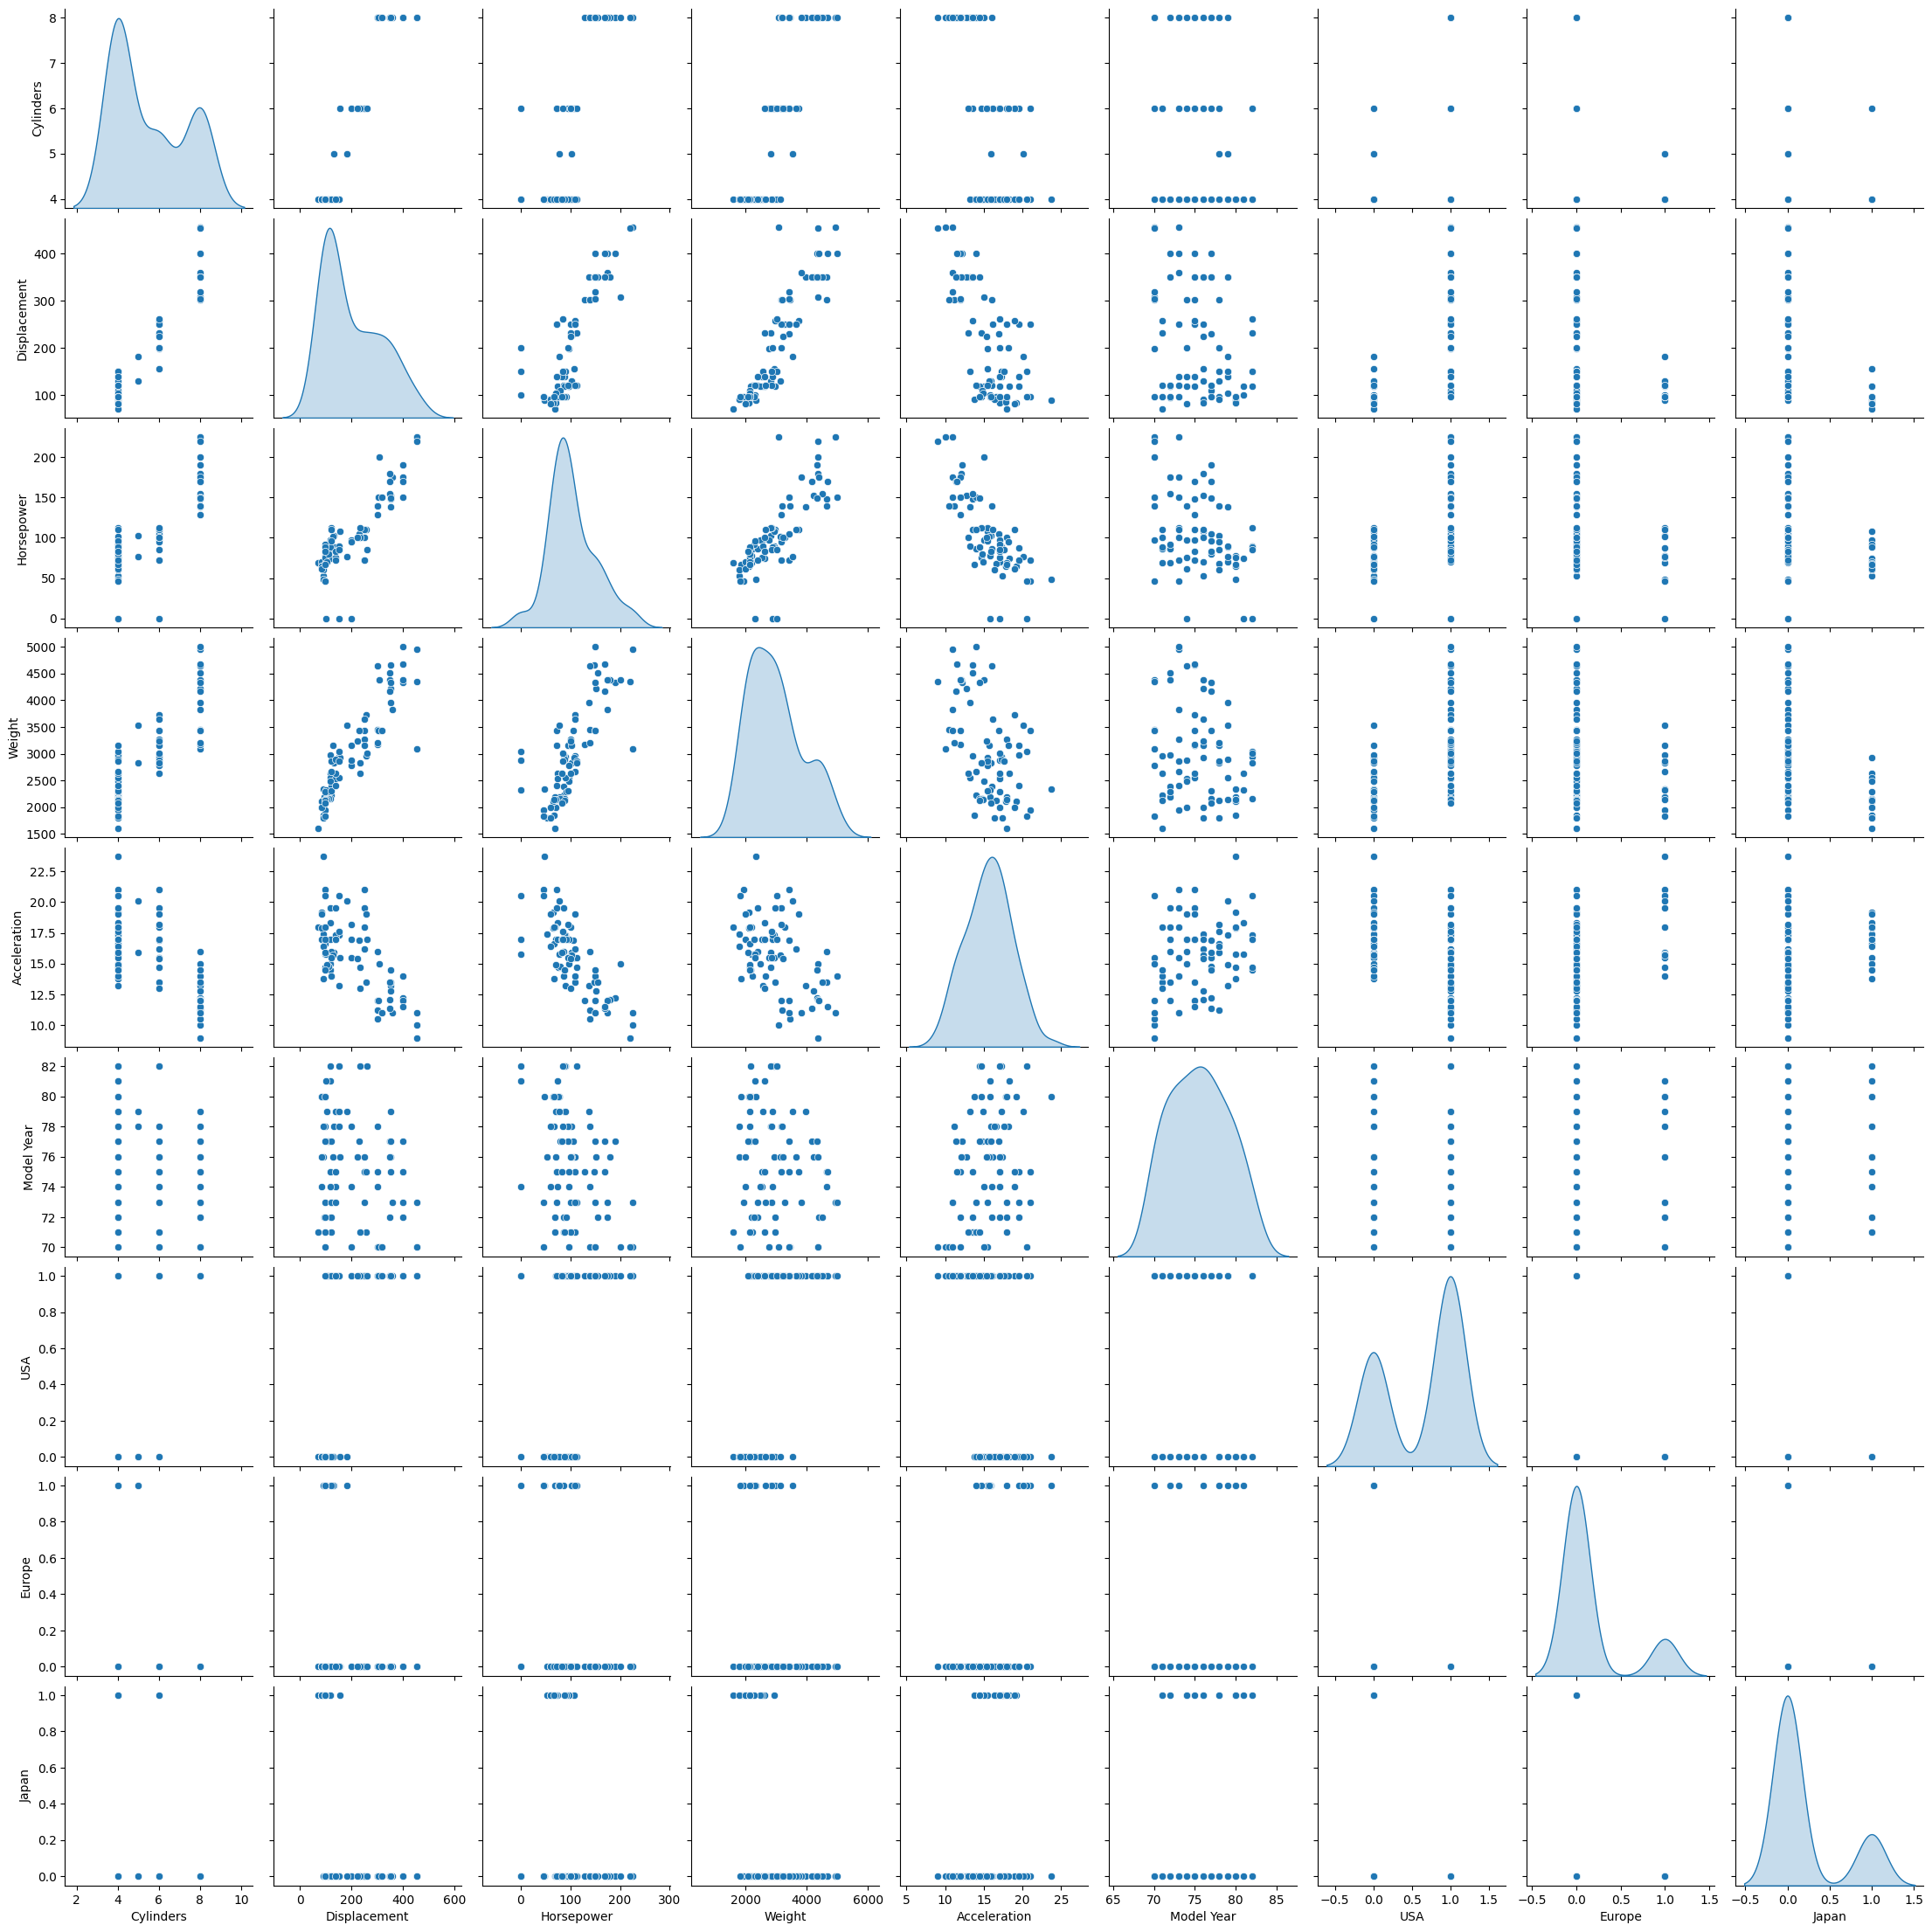

In [50]:
sns.pairplot(X_test,diag_kind = 'kde')

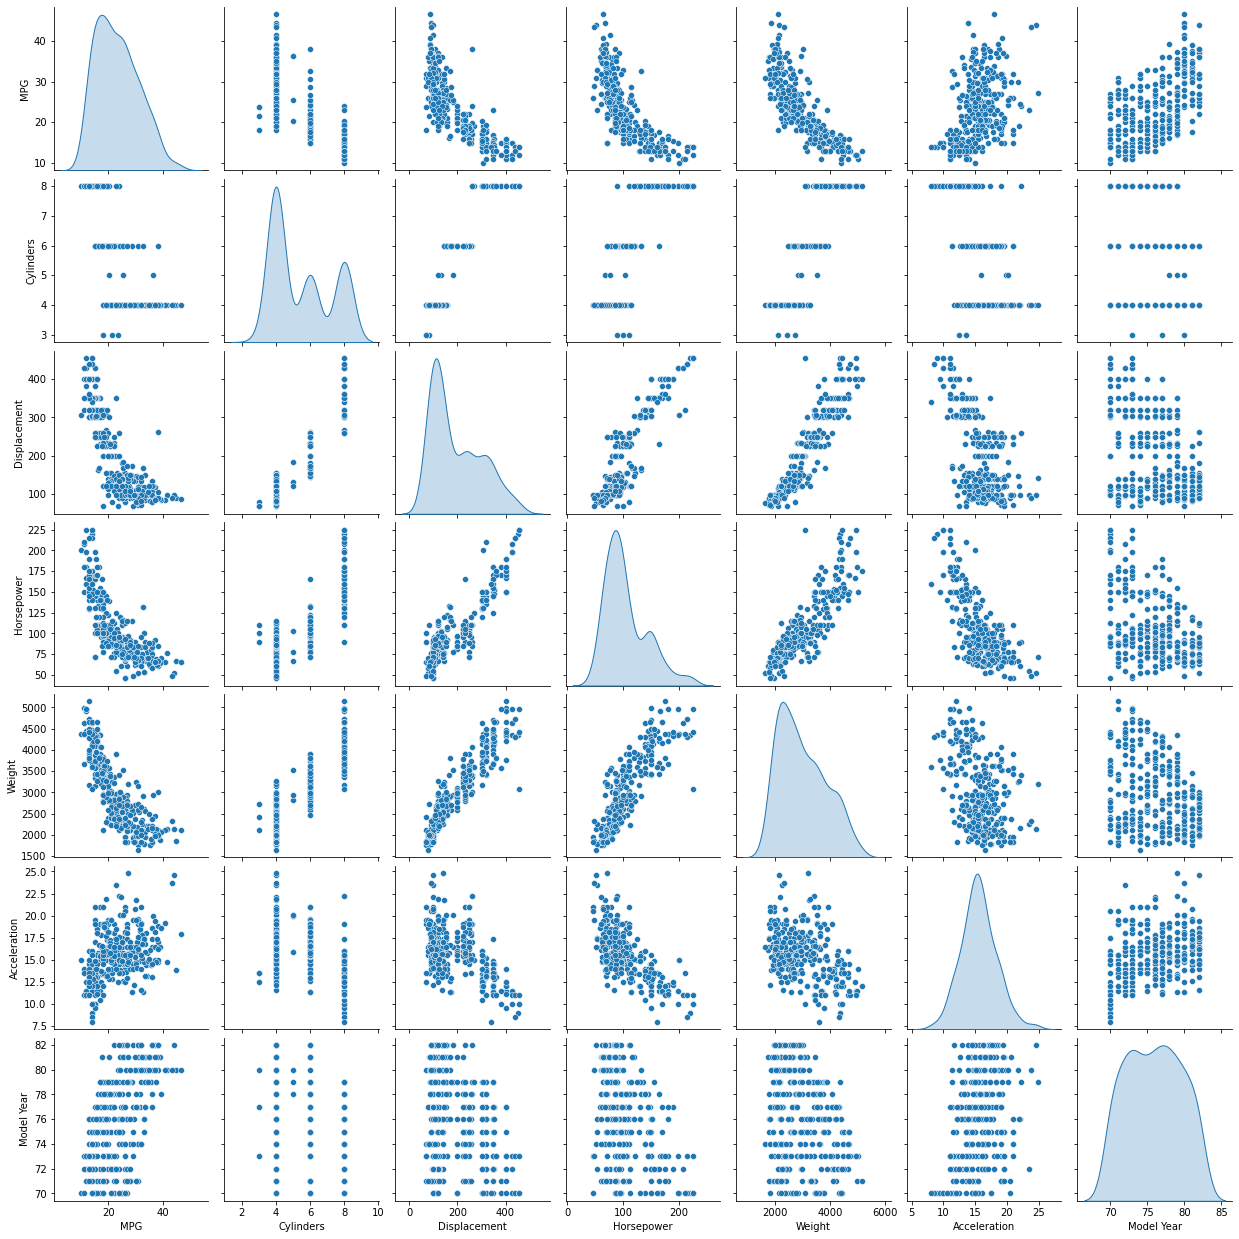

In [ ]:
# pairplot , diag_kind = 'kde'

Tambien revise las estadisticas generales:

In [51]:
train_dataset.describe()

,MPG,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
count,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000,318.000000
mean,23.590566,5.427673,193.061321,102.430818,2963.823899,15.595912,75.946541,0.641509,0.163522,0.194969
std,7.913617,1.682941,103.812742,40.500262,844.749805,2.796282,3.705266,0.480313,0.370424,0.396801
min,10.000000,3.000000,70.000000,0.000000,1613.000000,8.000000,70.000000,0.000000,0.000000,0.000000
25%,17.125000,4.000000,100.250000,75.000000,2219.250000,13.900000,73.000000,0.000000,0.000000,0.000000
50%,22.750000,4.000000,151.000000,90.000000,2792.500000,15.500000,76.000000,1.000000,0.000000,0.000000
75%,29.000000,6.000000,259.500000,120.000000,3571.250000,17.300000,79.000000,1.000000,0.000000,0.000000
max,46.600000,8.000000,455.000000,230.000000,5140.000000,24.800000,82.000000,1.000000,1.000000,1.000000


In [52]:
train_stats = train_dataset.describe()
train_stats.pop("MPG")
train_stats = train_stats.T
train_stats

,count,mean,std,min,25%,50%,75%,max
Cylinders,318.0,5.427673,1.682941,3.0,4.00,4.0,6.00,8.0
Displacement,318.0,193.061321,103.812742,70.0,100.25,151.0,259.50,455.0
Horsepower,318.0,102.430818,40.500262,0.0,75.00,90.0,120.00,230.0
Weight,318.0,2963.823899,844.749805,1613.0,2219.25,2792.5,3571.25,5140.0
Acceleration,318.0,15.595912,2.796282,8.0,13.90,15.5,17.30,24.8
Model Year,318.0,75.946541,3.705266,70.0,73.00,76.0,79.00,82.0
USA,318.0,0.641509,0.480313,0.0,0.00,1.0,1.00,1.0
Europe,318.0,0.163522,0.370424,0.0,0.00,0.0,0.00,1.0
Japan,318.0,0.194969,0.396801,0.0,0.00,0.0,0.00,1.0


### Separa las features del target

Separe el target de las features.

In [53]:
train_labels = train_dataset.pop('MPG')
test_labels = test_dataset.pop('MPG')

### Estandariza los datos

Es una buena práctica estandarizar funciones que utilizan diferentes escalas y rangos. Aunque el modelo podría converger sin estandarizar, dificulta el entrenamiento y hace que el modelo resultante dependa de la elección de las unidades utilizadas en la entrada.

In [54]:
def norm(x):
    return (x - train_stats['mean'])/train_stats['std']

from sklearn.preprocessing import StandardScaler

st_scaler = StandardScaler()
st_scaler.fit(train_dataset)

normed_train_data = st_scaler.transform(train_dataset)
normed_test_data = st_scaler.transform(test_dataset)

#normed_train_data = norm(train_dataset)
#normed_test_data = norm(test_dataset)

print(normed_train_data.shape)
print(normed_test_data.shape)

# Podemos utilizar scalados de sklearn

(318, 9)
(80, 9)


In [55]:
normed_train_data

array([[ 1.5308799 ,  1.52377825,  1.25058158, ...,  0.747545  ,
        -0.44214107, -0.49212549],
       [-0.84965706, -0.51193088, -0.67836721, ...,  0.747545  ,
        -0.44214107, -0.49212549],
       [ 1.5308799 ,  1.05103063,  0.92909012, ...,  0.747545  ,
        -0.44214107, -0.49212549],
       ...,
       [ 0.34061142,  0.30814152, -0.06011439, ...,  0.747545  ,
        -0.44214107, -0.49212549],
       [-0.84965706, -0.74348073, -0.67836721, ..., -1.33771211,
         2.2617216 , -0.49212549],
       [-0.84965706, -0.92679103, -0.60417687, ..., -1.33771211,
         2.2617216 , -0.49212549]])

Estos datos estandarizados es lo que usaremos para entrenar el modelo.

## El modelo

### Construye el modelo

Construyamos nuestro modelo. Aquí, utilizaremos un modelo `secuencial` con dos capas ocultas densamente conectadas y una capa de salida que devuelve un único valor continuo.

Por tanto, tendrá tres capas. Una de entrada con activación relu. Otra hidden layer con activación relu y la de salida de regresión, que se compondrá de una única neurona. Pon las neuronas que consideres para las dos primeras capas.

Para el compile utiliza un loss='mse'.

optimizer = `tf.keras.optimizers.RMSprop(0.001)`

Y en metrics añade en una lista el `mae` y `mse`.

In [57]:
normed_train_data

array([[ 1.5308799 ,  1.52377825,  1.25058158, ...,  0.747545  ,
        -0.44214107, -0.49212549],
       [-0.84965706, -0.51193088, -0.67836721, ...,  0.747545  ,
        -0.44214107, -0.49212549],
       [ 1.5308799 ,  1.05103063,  0.92909012, ...,  0.747545  ,
        -0.44214107, -0.49212549],
       ...,
       [ 0.34061142,  0.30814152, -0.06011439, ...,  0.747545  ,
        -0.44214107, -0.49212549],
       [-0.84965706, -0.74348073, -0.67836721, ..., -1.33771211,
         2.2617216 , -0.49212549],
       [-0.84965706, -0.92679103, -0.60417687, ..., -1.33771211,
         2.2617216 , -0.49212549]])

In [58]:
normed_train_data.shape

(318, 9)

In [ ]:
# modelo secuencial

# dos capas con 64 y una densa de salida para regresion

# compilamos con mse, adam y metricas mae y mse

In [64]:
model = keras.models.Sequential() # Instanciamos el modelo
model.add(keras.layers.Dense(64, activation="relu",input_shape=(9,))) # primera capa (hidden)
model.add(keras.layers.Dense(64, activation="relu")) # segunda capa (hidden)
# model.add(keras.layers.Dense(1, activation=None)) # segunda capa (hidden)

model.add(keras.layers.Dense(units = 1,activation=None)) # Capa de salida (classification, 10 class)



c:\Users\Victor\miniconda3\envs\DL_ENV\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [65]:
model.compile(
    optimizer = "adam", # Adam
    loss = "MSE", # sparse_cat vs cat. 
    metrics = ["MAE","MSE"] # la que mejor nos venga
)



### Inspeccione el modelo

Use el método `.summary` para imprimir una descripción simple del modelo

In [66]:
model.summary()



Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ dense_3 (Dense)                 │ (None, 64)             │           640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_4 (Dense)                 │ (None, 64)             │         4,160 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_5 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 4,865 (19.00 KB)

 Trainable params: 4,865 (19.00 KB)

 Non-trainable params: 0 (0.00 B)

### Entrenar el modelo

Entrene el modelo para 1000 epochs y guarda los resultados del entrenamiento en una variable llamada `history`.
Emplea en el entrenamiento un 20% de los datos para validación, mediante el argumento `validation_split`.

NOTA: recuerda usar los datos normalizados.

In [ ]:
# model fit
# con normed_train_data y train_labels, epocas 1000, validation_split 0.2

In [67]:
history = model.fit(normed_train_data,
                    train_labels,
                    epochs = 1000,
                    validation_split = 0.2)

Epoch 1/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 1s 19ms/step - MAE: 22.7521 - MSE: 586.9411 - loss: 586.9411 - val_MAE: 22.9755 - val_MSE: 587.9774 - val_loss: 587.9774
Epoch 2/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 22.7459 - MSE: 580.2585 - loss: 580.2585 - val_MAE: 22.3309 - val_MSE: 559.2723 - val_loss: 559.2723
Epoch 3/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 21.9819 - MSE: 551.3201 - loss: 551.3201 - val_MAE: 21.5585 - val_MSE: 526.2994 - val_loss: 526.2994
Epoch 4/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 20.8971 - MSE: 503.3291 - loss: 503.3291 - val_MAE: 20.5844 - val_MSE: 486.1577 - val_loss: 486.1577
Epoch 5/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 19.7704 - MSE: 458.7928 - loss: 458.7928 - val_MAE: 19.3550 - val_MSE: 437.2460 - val_loss: 437.2460
Epoch 6/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - MAE: 18.4012 - MSE: 402.3563 - loss: 402.3563 - val_MAE: 17.8306 - val_MSE: 379.1636 - val_loss: 379.1636
Epoch 7/1000
8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step -

Visualice el progreso de entrenamiento del modelo usando las estadísticas almacenadas en el objeto `history`.

In [77]:
df_hist = pd.DataFrame(history.history)
df_hist['epoch'] = history.epoch
df_hist

,MAE,MSE,loss,val_MAE,val_MSE,val_loss,epoch
0,23.077824,598.734680,598.734680,22.975487,587.977417,587.977417,0
1,22.422909,570.015869,570.015869,22.330889,559.272339,559.272339,1
2,21.712444,539.573914,539.573914,21.558533,526.299377,526.299377,2
3,20.834675,502.998657,502.998657,20.584448,486.157745,486.157745,3
4,19.691702,457.777557,457.777557,19.354990,437.245972,437.245972,4
...,...,...,...,...,...,...,...
995,0.859755,2.042566,2.042566,2.025175,8.432913,8.432913,995
996,0.873810,2.070221,2.070221,1.986256,8.336052,8.336052,996
997,0.871814,2.132722,2.132722,1.984460,8.255878,8.255878,997
998,0.869688,2.017575,2.017575,1.989235,8.333821,8.333821,998


In [78]:
df_hist.head(50)

,MAE,MSE,loss,val_MAE,val_MSE,val_loss,epoch
0,23.077824,598.734680,598.734680,22.975487,587.977417,587.977417,0
1,22.422909,570.015869,570.015869,22.330889,559.272339,559.272339,1
2,21.712444,539.573914,539.573914,21.558533,526.299377,526.299377,2
3,20.834675,502.998657,502.998657,20.584448,486.157745,486.157745,3
4,19.691702,457.777557,457.777557,19.354990,437.245972,437.245972,4
5,18.293280,404.547302,404.547302,17.830627,379.163635,379.163635,5
6,16.599491,343.995667,343.995667,16.084450,313.085022,313.085022,6
7,14.663371,275.804016,275.804016,14.087481,242.735199,242.735199,7
8,12.536482,205.076401,205.076401,11.953783,174.029587,174.029587,8
9,10.313230,140.209930,140.209930,9.567476,113.818665,113.818665,9


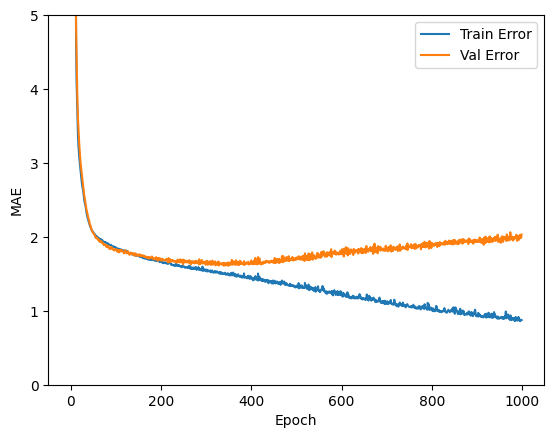

In [82]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MAE')
plt.plot(df_hist['epoch'], df_hist['MAE'], label=['Train Error'] )
plt.plot(df_hist['epoch'], df_hist['val_MAE'], label=['Val Error'] )
plt.ylim([0,5])

plt.legend()

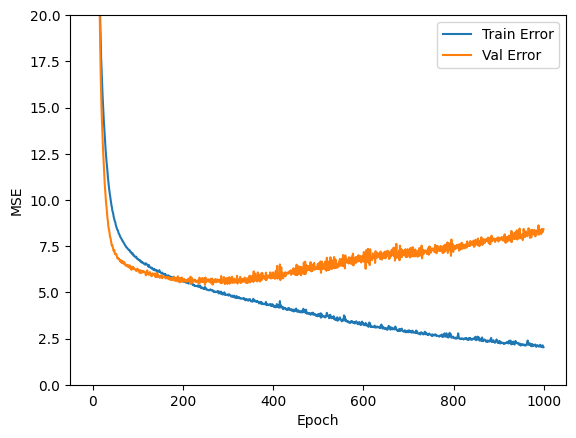

In [83]:
plt.figure()
plt.xlabel('Epoch')
plt.ylabel('MSE')
plt.plot(df_hist['epoch'], df_hist['MSE'], label=['Train Error'] )
plt.plot(df_hist['epoch'], df_hist['val_MSE'], label=['Val Error'] )
plt.ylim([0,20])
plt.legend()

In [86]:
def plot_history(history, ylim1=(0,20), ylim2=(0,20)):
    df_hist = pd.DataFrame(history.history)
    df_hist['epoch'] = history.epoch
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MAE')
    plt.plot(df_hist['epoch'], df_hist['MAE'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_MAE'], label=['Val Error'] )
    plt.ylim(ylim1)
    plt.legend()
    plt.figure()
    plt.xlabel('Epoch')
    plt.ylabel('MSE')
    plt.plot(df_hist['epoch'], df_hist['MSE'], label=['Train Error'] )
    plt.plot(df_hist['epoch'], df_hist['val_MSE'], label=['Val Error'] )
    plt.ylim(ylim2)
    plt.legend()

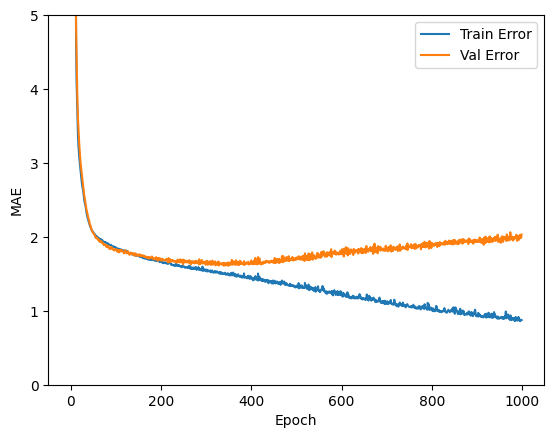

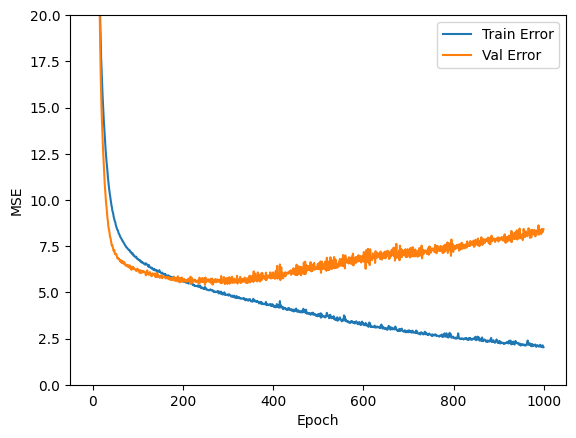

In [87]:
plot_history(history, ylim1 = (0,5))

¿Alguna conclusión respecto a este gráfico?

# BONUS TRACK!!
Investigadme esto

Añade un early stopping al modelo. Pon el argumento `callbacks=[keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]` dentro del fit().

Después del entrenamiento utiliza la función del apartado anterior `plot_history(history)`.

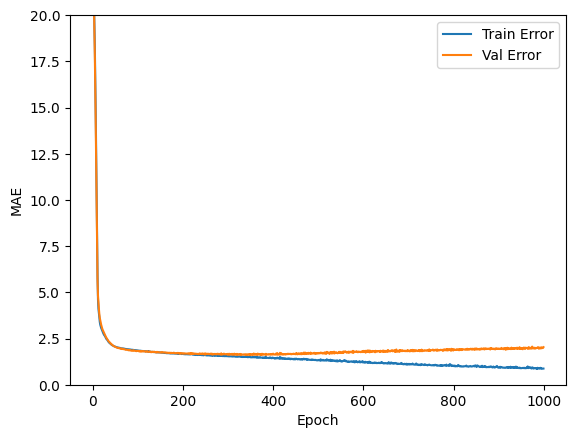

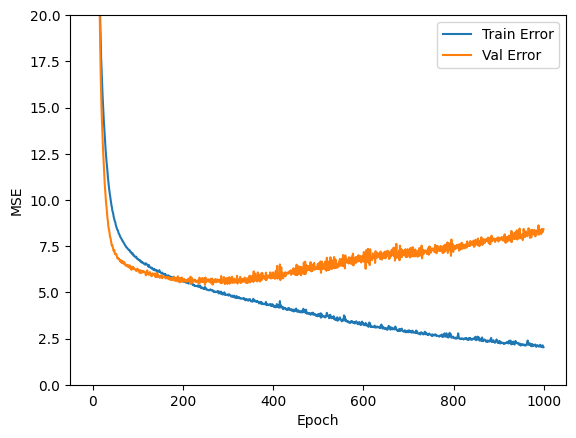

In [88]:
# HAY QUE REPETIR EL MODELO PERO CON EARLY STOPPING Y  PATIENCE 10
# [keras.callbacks.EarlyStopping(monitor='val_loss', patience=10)]
plot_history(history)

# SE ACABO EL BONUS TRACK, ESTO SI!!!

Interpreta el gráfico

Veamos qué tan bien generaliza el modelo al usar el conjunto de **test**. Esto nos dice qué tan bien podemos esperar que el modelo prediga cuándo lo usamos en el mundo real. Utiliza el método `evaluate` con los datos de test normalizados y sus labels.

Con el método evaluate devolverá tres valores: loss, mae y mse.

In [89]:
loss, mae, mse = model.evaluate(normed_test_data, test_labels)
mae

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step - MAE: 1.9739 - MSE: 7.7183 - loss: 7.7183  


2.262425661087036

In [90]:
from sklearn.metrics import r2_score

In [91]:
r2_score(test_labels, model.predict(normed_test_data))

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step 


0.8253541338910849

In [92]:
model.save("my_keras_model_MAE_1_96.h5")

Ahora prueba el modelo. Coge 10 ejemplos de train y llama a` model.predict`.

In [93]:
result_10 = model.predict(normed_train_data[:10])
result_10

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 25ms/step


array([[14.548259],
       [23.445936],
       [12.99887 ],
       [20.352024],
       [17.544968],
       [33.779484],
       [33.314754],
       [19.92753 ],
       [14.760136],
       [23.558619]], dtype=float32)

### Haz Predicciones

Dibuja en un scatter plot las predicciones de test vs sus true labels.

3/3 ━━━━━━━━━━━━━━━━━━━━ 0s 0s/step  


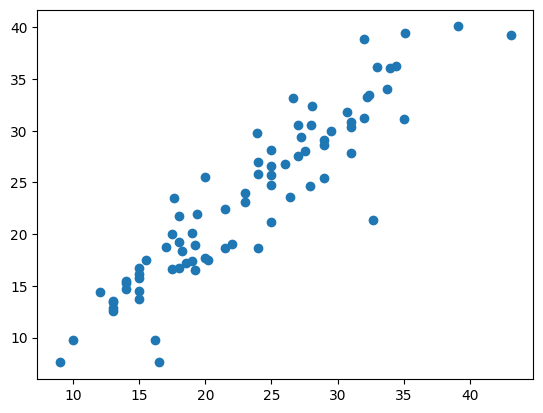

In [99]:
test_predictions = model.predict(normed_test_data)
plt.scatter(test_labels, test_predictions)

Parece que nuestro modelo predice razonablemente bien. Echemos un vistazo a la distribución de errores.

Representa los residuos en un histograma

In [105]:
error = test_predictions - test_labels

plt.hist(error)

ValueError: Data must be 1-dimensional, got ndarray of shape (80, 80) instead

No es del todo gaussiano, pero podríamos esperar eso porque el número de muestras es muy pequeño.

## Conclusion

Este cuaderno introdujo algunas técnicas para manejar un problema de regresión.

* El error cuadrático medio (MSE) es una función de pérdida común utilizada para problemas de regresión (se utilizan diferentes funciones de pérdida para problemas de clasificación).
* Del mismo modo, las métricas de evaluación utilizadas para la regresión difieren de la clasificación. Una métrica de regresión común es el error absoluto medio (MAE).
* Cuando las características de datos de entrada numéricos tienen valores con diferentes rangos, cada característica debe escalarse independientemente al mismo rango.
* Si no hay muchos datos de entrenamiento, una técnica es preferir una red pequeña con pocas capas ocultas para evitar el sobreajuste.
* La detención temprana es una técnica útil para evitar el sobreajuste.

In [106]:
model_loaded = keras.models.load_model("my_keras_model_MAE_1_96.h5")

test_predictions = model_loaded.predict(normed_test_data).flatten()

TypeError: Could not locate function 'MSE'. Make sure custom classes are decorated with `@keras.saving.register_keras_serializable()`. Full object config: {'module': 'keras.metrics', 'class_name': 'function', 'config': 'MSE', 'registered_name': 'MSE'}

In [59]:
test_predictions

array([15.724552 , 11.683048 , 12.47341  , 23.602165 , 21.050465 ,
       13.462151 , 13.192361 , 13.379283 , 19.690887 , 30.02945  ,
       25.153633 , 24.985764 , 14.308925 , 25.710617 , 12.290881 ,
       13.581768 , 14.205824 , 13.1787195, 18.890953 , 12.687322 ,
       12.934426 , 25.826237 , 19.114384 , 20.23384  , 30.077175 ,
       23.496483 , 15.980178 , 23.140163 , 16.474903 , 20.652336 ,
       28.213821 , 21.355206 , 18.866337 , 21.765427 , 26.150589 ,
       15.740327 , 19.379036 , 32.69873  , 30.529648 , 17.15385  ,
       31.238178 , 29.412548 , 15.778153 , 35.69676  , 34.388645 ,
       35.85762  , 20.508686 , 22.531406 , 20.841087 , 26.521431 ,
       30.363766 , 19.66843  , 32.53331  , 18.567234 , 17.504608 ,
       17.673996 , 33.953976 , 35.18694  , 22.246986 , 24.395443 ,
       38.045296 , 33.432056 , 28.231087 , 28.207329 , 32.5648   ,
       39.756073 , 37.1423   , 36.268513 , 34.033016 , 29.40741  ,
       22.342922 , 21.964573 , 29.8344   , 31.03479  , 36.1142